In [1]:
import numpy as np


# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from scipy.spatial import distance
from scipy.linalg import norm
from scipy.spatial.distance import euclidean
from qiskit import IBMQ
from qiskit.providers.aer.noise import NoiseModel
# Loading your IBM Quantum account(s)
token = IBMQ.save_account('24f9b17bb2ed402e361d6135ce47685773353c2456e773993f11cffbc7d378f47c760784f62935349429e848999e1029cc97eead6c183bd45a5bb1ce9c784628')

configrc.store_credentials:WARNING:2022-07-06 15:24:31,501: Credentials already present. Set overwrite=True to overwrite.


In [25]:
def all_error(circ, qubits):
    import numpy as np
    from qiskit import QuantumCircuit, transpile
    from qiskit.quantum_info import Kraus, SuperOp
    from qiskit.providers.aer import AerSimulator
    from qiskit.tools.visualization import plot_histogram

    # Import from Qiskit Aer noise module
    from qiskit.providers.aer.noise import NoiseModel
    from qiskit.providers.aer.noise import QuantumError, ReadoutError
    from qiskit.providers.aer.noise import pauli_error
    from qiskit.providers.aer.noise import depolarizing_error
    from qiskit.providers.aer.noise import thermal_relaxation_error
    from qiskit.providers.ibmq.job import job_monitor
    
    
    
    provider = IBMQ.load_account()
    get_provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
    backends = provider.backends()
    print(backends)
    C = ['ibmq_armonk', 'ibmq_lima', 'ibmq_belem', 'ibmq_quito', 'ibmq_manila', 'ibm_nairobi', 'ibm_oslo']
    for i in range(len(C)):
        
        
        backend = provider.get_backend(C[i])
        if(backend.configuration().n_qubits > 2):
            print(backend, end='\n')
            noise_model = NoiseModel.from_backend(backend)
            coupling_map = backend.configuration().coupling_map
            basis_gates = noise_model.basis_gates
            #real_hardware_run = transpile(circ, noise_model)
            #qobj = assemble(circ, backend=backend, shots=1024)
        # execute the circuit
            #job = backend.run(qobj)
            real_run = transpile(circ, backend= provider.get_backend(C[i]), coupling_map=coupling_map, basis_gates=basis_gates)
            job = backend.run(real_run, shots= 8192)
            print(job.job_id(), end='\n')
            job_monitor(job)
            counts = job.result().get_counts()
            plot_bit= plot_histogram(counts)
            display(plot_bit)
    return plot_bit

In [3]:
# GHZ gate
q_ghz = QuantumRegister(3)
c_ghz = ClassicalRegister(3)
ghz_circ = QuantumCircuit(q_ghz, c_ghz)
ghz_circ.h(q_ghz[0])
ghz_circ.cx(q_ghz[0], q_ghz[1])
ghz_circ.cx(q_ghz[1], q_ghz[2])
ghz_circ.measure(q_ghz[0:3], c_ghz[0:3])
ghz_circ.draw()

┌───┐          ┌─┐      
q0_0: ┤ H ├──■───────┤M├──────
      └───┘┌─┴─┐     └╥┘┌─┐   
q0_1: ─────┤ X ├──■───╫─┤M├───
           └───┘┌─┴─┐ ║ └╥┘┌─┐
q0_2: ──────────┤ X ├─╫──╫─┤M├
                └───┘ ║  ║ └╥┘
c0: 3/════════════════╩══╩══╩═
                      0  1  2

ibmqfactory.load_account:WARNING:2022-07-06 16:00:03,608: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_oslo') from IBM

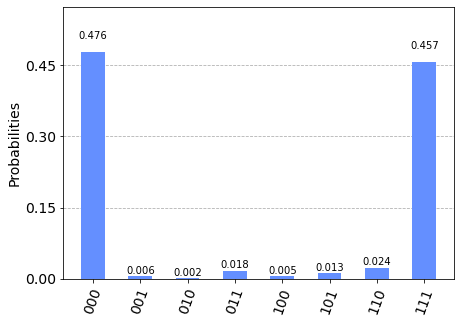

ibmq_belem


C:\Users\Sakib\miniconda3\envs\qiskit\lib\site-packages\qiskit\providers\aer\noise\device\models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (89038.19662302293 > 2 * 39338.38096021822). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\Sakib\miniconda3\envs\qiskit\lib\site-packages\qiskit\providers\aer\noise\device\models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (89038.19662302293 > 2 * 39338.38096021822). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\Sakib\miniconda3\envs\qiskit\lib\site-packages\qiskit\providers\aer\noise\device\models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (89038.19662302293 > 2 * 39338.38096

62c5843108f974aaa8669e31
Job Status: job has successfully run                           


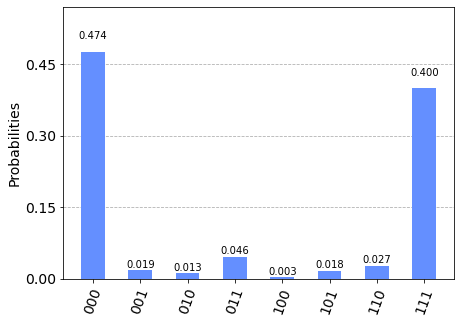

ibmq_quito
62c59fd608f97414f466a0af
Job Status: job has successfully run                          


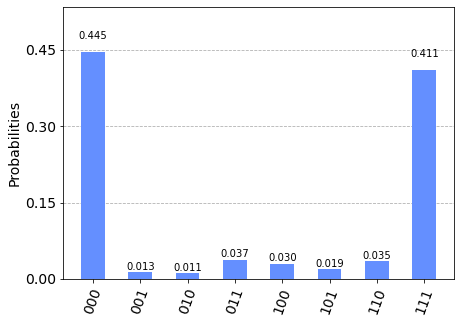

ibmq_manila
62c5a498716a31a0445678a5
Job Status: job has successfully run                          


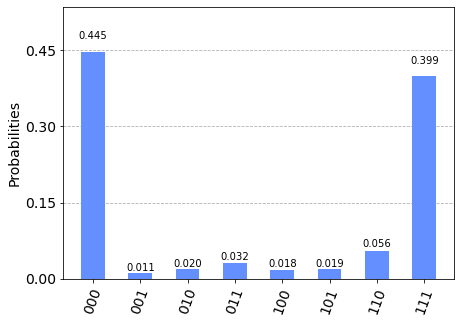

ibm_nairobi
62c5a702e47a73073f1ab851
Job Status: job has successfully run                          


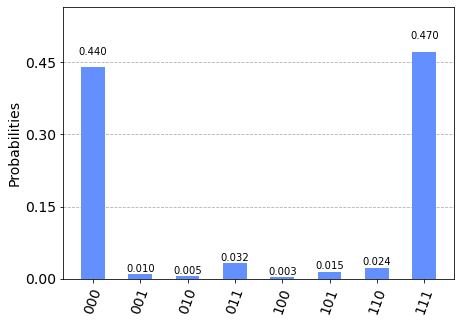

ibm_oslo


In [ ]:
all_error(ghz_circ, len(q_ghz))

In [5]:
#Mermin_Bell gate
from math import pi
mer_bell = QuantumRegister(3)
mer_bell_c =  ClassicalRegister(3)
mer_bell_circ = QuantumCircuit(mer_bell, mer_bell_c)
mer_bell_circ.rx(-pi/2, mer_bell[0])
mer_bell_circ.cx(mer_bell[0], mer_bell[1])
mer_bell_circ.cx(mer_bell[1], mer_bell[2])
mer_bell_circ.h(mer_bell[1])
mer_bell_circ.h(mer_bell[2])
mer_bell_circ.cx(mer_bell[0], mer_bell[2])
mer_bell_circ.cx(mer_bell[1], mer_bell[2])
mer_bell_circ.cx(mer_bell[2], mer_bell[0])
mer_bell_circ.cx(mer_bell[1], mer_bell[0])
mer_bell_circ.s(mer_bell[2])
mer_bell_circ.s(mer_bell[0])
mer_bell_circ.h(mer_bell[2])
mer_bell_circ.cz(mer_bell[0], mer_bell[1])
mer_bell_circ.h(mer_bell[0])
mer_bell_circ.s(mer_bell[1])
mer_bell_circ.h(mer_bell[1])
mer_bell_circ.measure(mer_bell[0:3], mer_bell_c[0:3])
display(mer_bell_circ.draw())
                           

┌──────────┐                         ┌───┐┌───┐┌───┐   ┌───┐     ┌─┐   
q55_0: ┤ Rx(-π/2) ├──■──────────────■───────┤ X ├┤ X ├┤ S ├─■─┤ H ├─────┤M├───
       └──────────┘┌─┴─┐     ┌───┐  │       └─┬─┘└─┬─┘└───┘ │ ├───┤┌───┐└╥┘┌─┐
q55_1: ────────────┤ X ├──■──┤ H ├──┼────■────┼────■────────■─┤ S ├┤ H ├─╫─┤M├
                   └───┘┌─┴─┐├───┤┌─┴─┐┌─┴─┐  │  ┌───┐┌───┐┌─┐└───┘└───┘ ║ └╥┘
q55_2: ─────────────────┤ X ├┤ H ├┤ X ├┤ X ├──■──┤ S ├┤ H ├┤M├───────────╫──╫─
                        └───┘└───┘└───┘└───┘     └───┘└───┘└╥┘           ║  ║ 
 c1: 3/═════════════════════════════════════════════════════╩════════════╩══╩═
                                                            2            0  1

ibmqfactory.load_account:WARNING:2022-07-06 15:27:01,043: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_oslo') from IBM

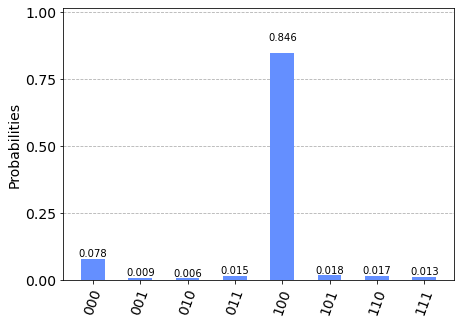

ibmq_belem


C:\Users\Sakib\miniconda3\envs\qiskit\lib\site-packages\qiskit\providers\aer\noise\device\models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (89038.19662302293 > 2 * 39338.38096021822). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\Sakib\miniconda3\envs\qiskit\lib\site-packages\qiskit\providers\aer\noise\device\models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (89038.19662302293 > 2 * 39338.38096021822). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\Sakib\miniconda3\envs\qiskit\lib\site-packages\qiskit\providers\aer\noise\device\models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (89038.19662302293 > 2 * 39338.38096

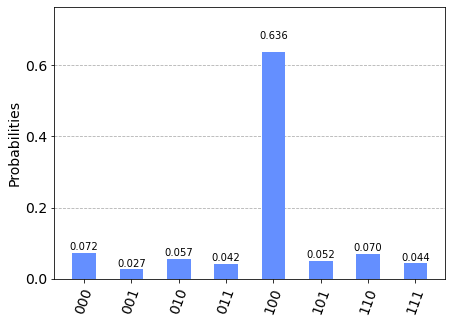

ibmq_quito


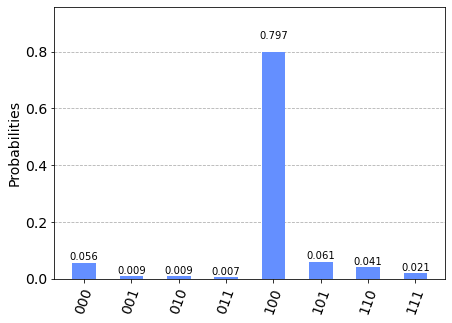

ibmq_manila


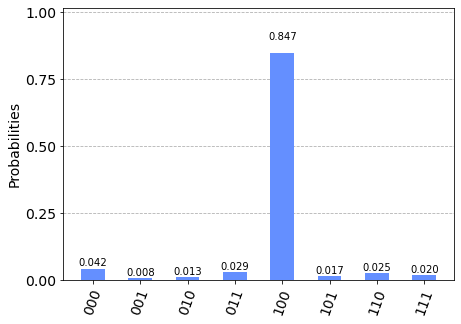

ibm_nairobi


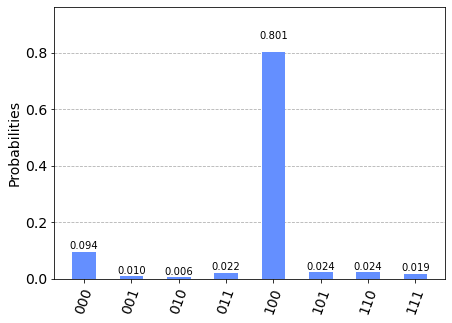

ibm_oslo


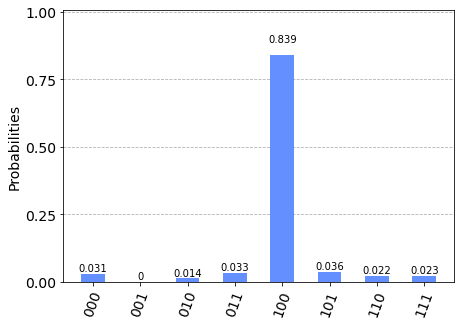

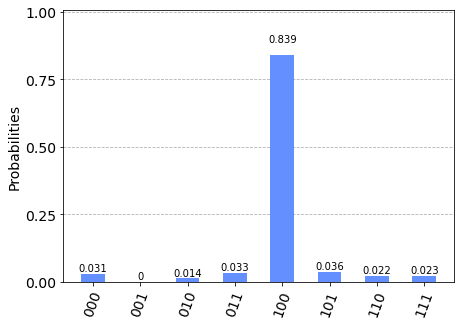

In [6]:
all_error(mer_bell_circ, len(mer_bell))

In [7]:
#phase code
phase_q = QuantumRegister(5)
phase_c = ClassicalRegister(5)
phase_circ = QuantumCircuit(phase_q, phase_c)
phase_circ.h(phase_q[0])
phase_circ.initialize([1,0], 1)
phase_circ.x(phase_q[2])
phase_circ.initialize([1,0], 3)
phase_circ.h(phase_q[4])
phase_circ.h(phase_q[0:5])
phase_circ.cz(phase_q[0], phase_q[1])
phase_circ.h(phase_q[2])
phase_circ.h(phase_q[0])
phase_circ.cz(phase_q[1], phase_q[2])
phase_circ.h(phase_q[1])
phase_circ.cz(phase_q[2], phase_q[3])
phase_circ.h(phase_q[2])
phase_circ.cz(phase_q[3], phase_q[4])
phase_circ.h(phase_q[3])
phase_circ.h(phase_q[4])
phase_circ.barrier()
phase_circ.measure(phase_q[0:4], phase_c[0:4])
display(phase_circ.draw())

┌───┐       ┌───┐     ┌───┐                ░ ┌─┐         
q176_0: ───────┤ H ├───────┤ H ├──■──┤ H ├────────────────░─┤M├─────────
        ┌──────┴───┴──────┐├───┤  │  └───┘┌───┐           ░ └╥┘┌─┐      
q176_1: ┤ Initialize(1,0) ├┤ H ├──■────■──┤ H ├───────────░──╫─┤M├──────
        └──────┬───┬──────┘├───┤┌───┐  │  └───┘┌───┐      ░  ║ └╥┘┌─┐   
q176_2: ───────┤ X ├───────┤ H ├┤ H ├──■────■──┤ H ├──────░──╫──╫─┤M├───
        ┌──────┴───┴──────┐├───┤└───┘       │  └───┘┌───┐ ░  ║  ║ └╥┘┌─┐
q176_3: ┤ Initialize(1,0) ├┤ H ├────────────■────■──┤ H ├─░──╫──╫──╫─┤M├
        └──────┬───┬──────┘├───┤                 │  ├───┤ ░  ║  ║  ║ └╥┘
q176_4: ───────┤ H ├───────┤ H ├─────────────────■──┤ H ├─░──╫──╫──╫──╫─
               └───┘       └───┘                    └───┘ ░  ║  ║  ║  ║ 
  c2: 5/═════════════════════════════════════════════════════╩══╩══╩══╩═
                                                             0  1  2  3

ibmqfactory.load_account:WARNING:2022-07-06 15:28:55,218: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_oslo') from IBM

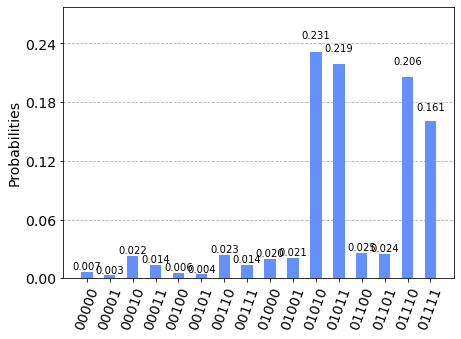

ibmq_belem


C:\Users\Sakib\miniconda3\envs\qiskit\lib\site-packages\qiskit\providers\aer\noise\device\models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (89038.19662302293 > 2 * 39338.38096021822). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\Sakib\miniconda3\envs\qiskit\lib\site-packages\qiskit\providers\aer\noise\device\models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (89038.19662302293 > 2 * 39338.38096021822). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\Sakib\miniconda3\envs\qiskit\lib\site-packages\qiskit\providers\aer\noise\device\models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (89038.19662302293 > 2 * 39338.38096

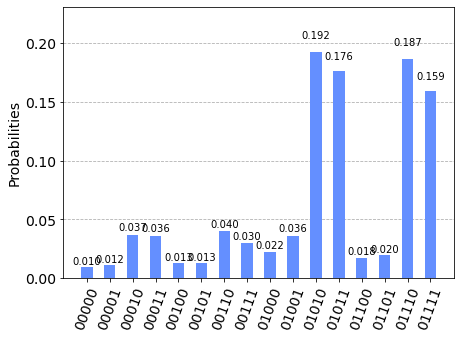

ibmq_quito


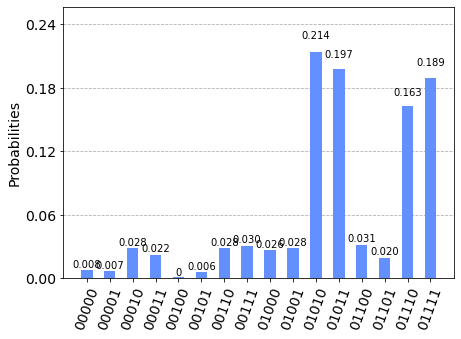

ibmq_manila


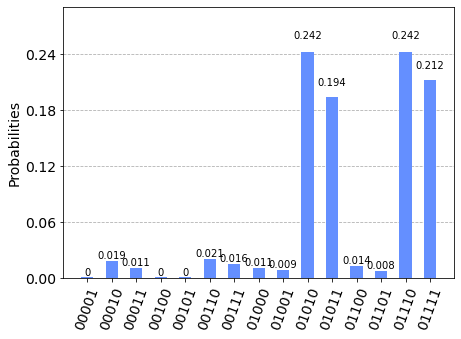

ibm_nairobi


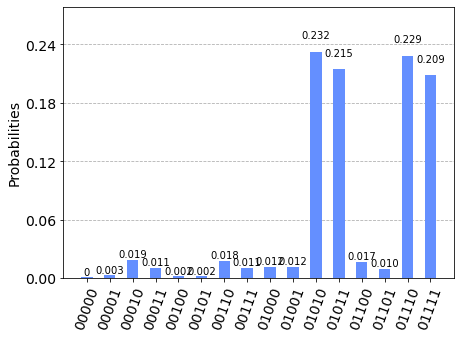

ibm_oslo


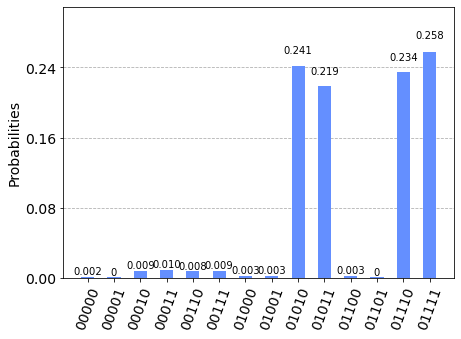

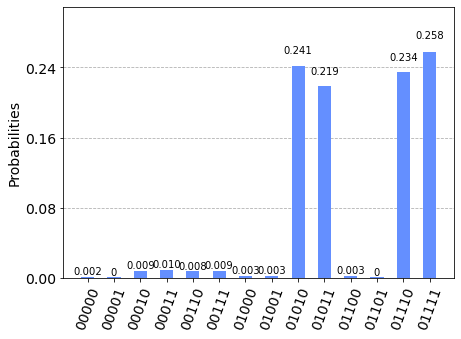

In [8]:
all_error(phase_circ, len(phase_q))